# Multiplicative Seasonality (Tính thời vụ nhân)

Theo mặc định, Prophet fit với tính thời vụ cộng, nghĩa là ảnh hưởng của tính thời vụ được cộng vào xu hướng để nhận dự báo. Chuỗi thời gian về số lượng hành khách đi máy bay này là một ví dụ về thời điểm tính thời vụ cộng không hoạt động:

In [1]:
import pandas as pd
from prophet import Prophet

14:21:22 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing


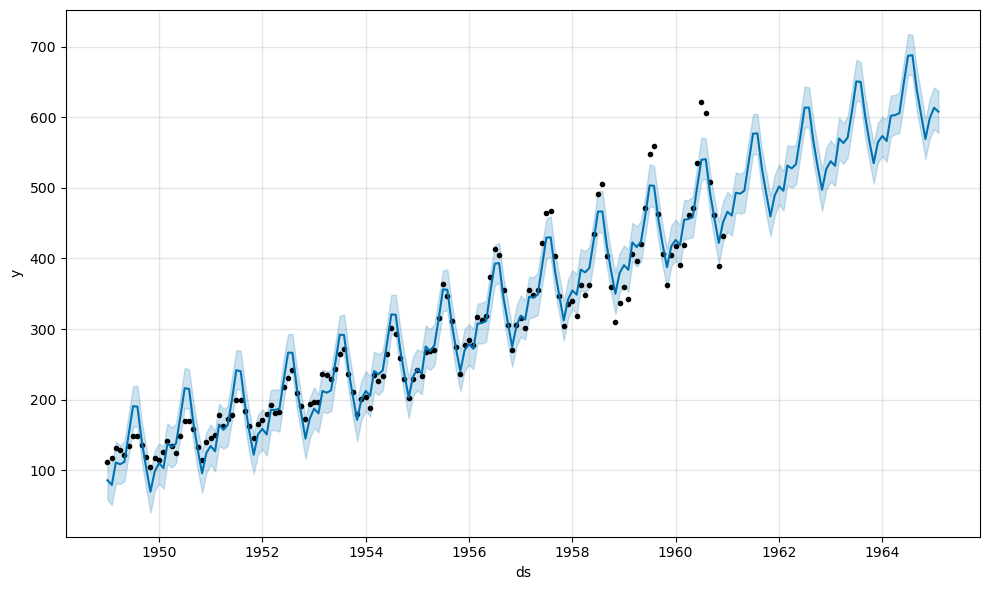

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv")
m=Prophet()
m.fit(df)
future=m.make_future_dataframe(50,freq='MS')
forecast=m.predict(future)
fig=m.plot(forecast)

Chuỗi thời gian này có chu kỳ hàng năm rõ ràng, nhưng tính thời vụ trong dự báo quá lớn ở đầu chuỗi thời gian và quá nhỏ ở cuối chuỗi. Trong chuỗi thời gian này, tính thời vụ không phải là yếu tố cộng cố định như Prophet giả định, thay vào đó, nó phát triển theo xu hướng. Đây là tính thời vụ nhân.

Prophet có thể lập mô hình tính thời vụ theo cấp số nhân bằng cách đặt `seasonality_mode='multiplicative'` trong đối số đầu vào

14:28:50 - cmdstanpy - INFO - Chain [1] start processing
14:28:50 - cmdstanpy - INFO - Chain [1] done processing


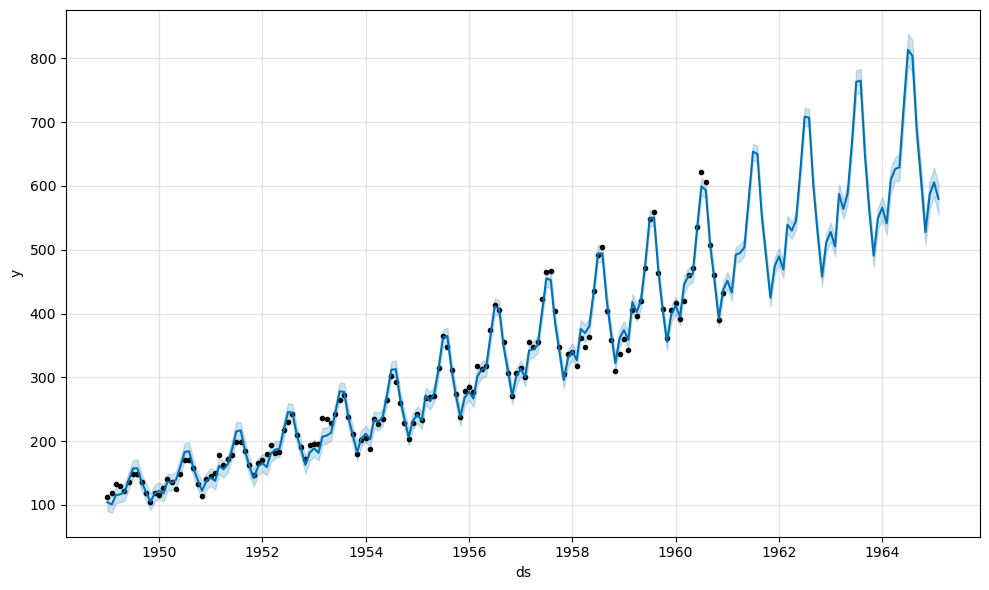

In [3]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast=m.predict(future)
fig=m.plot(forecast)

Con số thành phần bây giờ sẽ hiển thị tính thời vụ dưới dạng phần trăm của xu hướng:

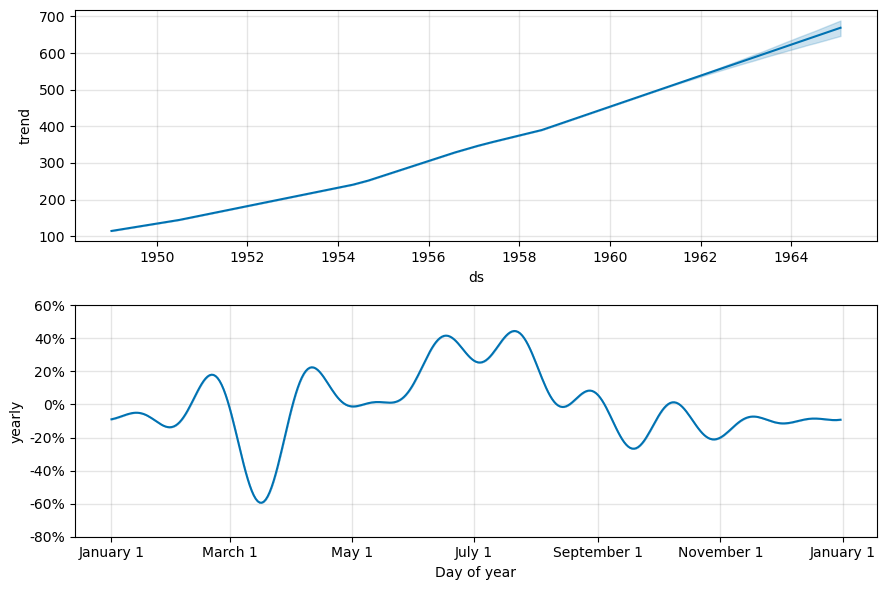

In [4]:
fig=m.plot_components(forecast)

Với `seasonity_mode='multiplative'`, các hiệu ứng ngày lễ cũng sẽ được lập mô hình theo cấp số nhân. Theo mặc định, bất kỳ yếu tố thời vụ hoặc biến hồi quy bổ sung nào được thêm vào sẽ sử dụng bất kỳ `seasonality_mode` nào được đặt thành, nhưng có thể bị ghi đè bằng cách chỉ định `mode='additive'` hoặc `mode='multiplicative'` làm đối số khi thêm yếu tố thời vụ hoặc hồi quy

Ví dụ: khối này đặt tính thời vụ tích hợp thành cấp số nhân, nhưng bao gồm tính thời vụ hàng quý cộng và một biến hồi quy cộng:

In [5]:
m=Prophet(seasonality_mode='multiplicative')
m.add_seasonality('quarterly', period=91.25,fourier_order=8,mode='additive')
m.add_regressor('regressoer',mode='additive')

Các biến hồi quy bổ sung cộng và nhân sẽ hiển thị trong các bảng riêng biệt trên biểu đồ thành phần. Tuy nhiên, xin lưu ý rằng rất khó có khả năng có sự kết hợp giữa tính thời vụ cộng và tính nhân, vì vậy điều này thường chỉ được sử dụng nếu có lý do để mong đợi điều đó xảy ra.